In [295]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [296]:
H = 0.25
L = 1

alpha = 207*10**(-6) #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C

#ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
ReC = 1708     #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 0.143E-6  #Thermal diffusivity of water
rho_i = 1000   #Density of water @ 20 C

L = 100
H = 0.001

nxy = 101
nt = 4000

dxy = L/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)
ya = np.ones((nxy,nxy))
for i in range(nxy):
    ya[:,i] = y
#Change to Kelivin?
To = 20
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #initial kinematic viscosity of water
delT = (1700*vo*1.43*10**(-7))/(alpha*g*H**3)
Ti = np.ones((nxy, nxy))*To
Ti[-1,:] = To + 50

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(Ti + 273 - 140)) / rho  #kinematic viscosity of water

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = rho[:,:] * ya[:,:] * g

ui = np.zeros((nxy,nxy), dtype=float)

print('delT =',delT, 'Tl =',20+delT)
print(vo)
#print('x =', x, 'y =', y)

delT = 120.36236563779158 Tl = 140.36236563779158
1.0054144180571545e-06


In [297]:
# stability
sigma = 0.00005
#dt = sigma*min(dxy,dxy)**2/D
dt = 0.001

print(dt)

0.001


In [298]:
print(dxy)

1.0


In [299]:
def ftcs(T, To, u, p, rho, rho_i, alpha, v, k, g, y, delT, nt, dt, dxy):
    
    for n in range(nt):
        
        # Boundary conditions
        u[-1,:] = 0 #Top Boundary
        u[0,:] = 0   #Bottom Boundary
        T[0,:] = To + 50 #Bottom Boundary
        T[-1,:] = To   #top Boundary

        un = u.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (k/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - 20))
        p[1:-1,1:-1] = rho[1:-1,1:-1]*ya[1:-1,1:-1] * g
        
        v[1:-1,1:-1] = 2.414*10**(-5) * 10**(247.8/(T[1:-1,1:-1] + 273 - 140)) / rho[1:-1,1:-1]
        
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-(1/rho_i)*(p[2:,1:-1] + p[1:-1,2:] - 2*p[1:-1,1:-1]) + (rho[1:-1,1:-1]*g/rho_i)\
                                           + (1/dxy)*(u[1:-1,1:-1]*0.5*(u[2:,1:-1] - u[:-2,1:-1] \
                                                                      + u[1:-1,2:] - u[1:-1,:-2]) \
                                           + (v[1:-1,1:-1]/dxy)*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1])))

                                           
    return T

In [300]:
T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,v,k,g,y,delT,nt,dt,dxy)

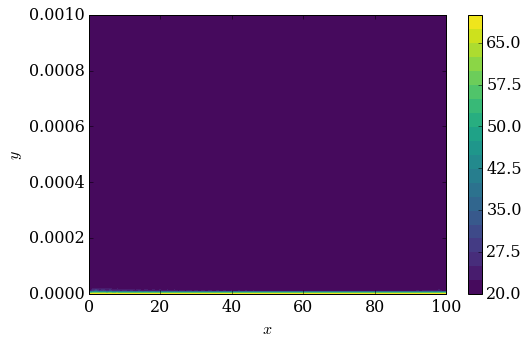

In [301]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,Ti,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


In [302]:
print(T)

[[ 70.          70.          70.         ...,  70.          70.          70.        ]
 [ 20.          27.60096924  33.3678202  ...,  24.3344959   21.96594549
   20.        ]
 [ 20.          21.81341708  21.22538079 ...,  20.24836803  20.21940148
   20.        ]
 ..., 
 [ 20.          20.          20.         ...,  20.          20.          20.        ]
 [ 20.          20.          20.         ...,  20.          20.          20.        ]
 [ 20.          20.          20.         ...,  20.          20.          20.        ]]


In [303]:
print(ui.argmax())

102


In [304]:
print(ui[1,3])

862.236960737


In [305]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

value = 900

loc = find_nearest(ui, value)
print(loc)

304


In [306]:
print(np.abs(ui-900).min())

37.7130942726


In [307]:
print(np.where(ui==900-np.abs(ui-900).min()))

(array([3], dtype=int64), array([1], dtype=int64))


In [308]:
print(ui)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.56294321e+02   2.67687601e-01 ...,   3.33246368e+00
    7.77994628e+00   0.00000000e+00]
 [  0.00000000e+00   2.68519390e-01   2.01981358e+01 ...,   9.53993220e+00
    1.89172248e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   3.33334679e+00   9.53869004e+00 ...,   4.93347341e+00
    3.46892015e+00   0.00000000e+00]
 [  0.00000000e+00   7.78136651e+00   1.89172552e+00 ...,   3.46892015e+00
    2.82793844e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
